In [1]:
from dataset import Dataset
from divergence_analysis import divergence_analysis
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Divergence Analysis
In this notebook, we will look at divergent uses of terms and topics between two corpora. 

What the two corpora are is flexible. We can compare:
<ul>
    <li>Male vs. Female Authors</li>
    <li>1990s vs. 2000s</li>
    <li>Male authors with female advisors vs. male authors with male advisors</li>
    <li>Harvard authors vs. non-Harvard authors</li>
</ul>

In each case, we want to know what terms are over or under-represented in one of the corpora.

## Male vs. Female Authors
Let's make this concrete and first look at male vs. female authors.

In [2]:
# Loads the entire dataset of dissertations
d = Dataset()

# Create two sub-datasets, one for female authors and one for male authors
c1 = d.copy().filter(author_gender='female')
c2 = d.copy().filter(author_gender='male')

# Run the divergence analysis
divergence_analysis(d, c1, c2, c1_name='female author', c2_name='male author',
                    topics_or_terms='terms', number_of_terms_to_print=20)
pass

             female author    female author freq    male author    male author freq
---------  ---------------  --------------------  -------------  ------------------
1976-1984              989             0.114348            2136           0.164497
1985-1989              950             0.109839            1698           0.130766
1990-1994             1183             0.136779            1854           0.14278
1995-1999             1696             0.196092            2340           0.180208
2000-2004             1762             0.203723            2323           0.178899
2005-2009             1445             0.167071            1922           0.148017
2010-2015              624             0.0721471            712           0.0548325


Terms distinctive for Corpus 1: female author. 8649 Theses

      term         dunning    frequency_score    count_total    count female author    count male author
----  ---------  ---------  -----------------  -------------  --------------------- 

Many numbers. Let's start at the top:
```
             female author    female author freq    male author    male author freq
---------  ---------------  --------------------  -------------  ------------------
1976-1984              989             0.114348            2136           0.164497
1985-1989              950             0.109839            1698           0.130766
1990-1994             1183             0.136779            1854           0.14278
1995-1999             1696             0.196092            2340           0.180208
2000-2004             1762             0.203723            2323           0.178899
2005-2009             1445             0.167071            1922           0.148017
2010-2015              624             0.0721471            712           0.0548325
```
This tells us how many theses we have overall and how they are distributed. 

For instance, 11.4% of the female dissertations date from 1976 to 1984 while 16.4% of the male ones do.

This chart can be useful to identify differences that arise from different temporal distributions. e.g. cultural history became more popular during the 2000s. Given that more women wrote their dissertations in the 2000s than in the 1980s, we would expect that cultural history skews female. However, that is in part because the female dataset skews towards later dates.


Let's next look at the 10 terms most distinctive for men and women:
```
Terms distinctive for Corpus 1: female author. 8649 Theses

      term         dunning    frequency_score    count_total    count female author    count male author
----  ---------  ---------  -----------------  -------------  ---------------------  -------------------
7834  woman      15294.6             0.918063          15206                  13427                 1779
7833  gender      2145.67            0.85441            3279                   2617                  662
7832  female      1925.66            0.90598            2075                   1798                  277
7831  women       1842.44            0.920505           1804                   1599                  205
7830  feminist    1177.7             0.945566            978                    901                   77
7829  family      1036.8             0.713735           5083                   3186                 1897
7828  child        918.202           0.775819           2545                   1781                  764
7827  feminism     549.101           0.940041            474                    433                   41
7826  male         500.911           0.778167           1362                    957                  405
7825  mother       453.589           0.848799            722                    571                  151


Terms distinctive for Corpus 2: male author. 12985 Theses

    term             dunning    frequency_score    count_total    count female author    count male author
--  -------------  ---------  -----------------  -------------  ---------------------  -------------------
 0  army           -661.414           0.255293            3113                    584                 2529
 1  war            -511.006           0.398332           13446                   4147                 9299
 2  military       -436.253           0.330615            4226                   1055                 3171
 3  party          -198.603           0.380496            3810                   1115                 2695
 4  officer        -188.659           0.272829            1031                    208                  823
 5  policy         -184.812           0.417635            7359                   2397                 4962
 6  air            -176.968           0.197333             549                     78                  471
 7  doctrine       -169.192           0.289408            1073                    231                  842
 8  force          -168.064           0.378197            3107                    903                 2204
 9  navy           -165.417           0.236735             677                    117                  560
```

### Dunning's Log-Likelihood Test
The tables are sorted by `dunning`, which is the Dunning Log-Likelihood test (G2) for the value. 

For a longer discussion of this score, see https://de.dariah.eu/tatom/feature_selection.html#chi2

Here's the intuition: Given two text corpora, our null hypothesis is that a given term should appear with the
same frequency in both corpora. e.g. we would expect the word "the" to make up about 1-2% of both corpora. 

Dunning's Log-Likelihood test gives us a way to test how far a term deviates from this null hypothesis, i.e.
how over or under-represented a term is in the female or male corpora (mathematically: how far the observed term counts
deviate from the expected term counts). 

Generally, terms will score high for G2 if a) they are frequent and b) they are heavily skewed towards one or another corpus. 
Ben Schmidt has a blog post which demonstrates how G2 captures a combination of additive difference (difference in absolute numbers) and
multiplicative difference (difference between frequencies): http://sappingattention.blogspot.com/2011/10/comparing-corpuses-by-word-use.html 

A Dunning value of 4 means p value < 0.05. A p value of 15314 as we find for "woman" means many many standard deviations away from expectation. 


This leads us to the first observation: The terms associated with female authors are on the whole far more distinctive than those associated with male authors. 
"Woman," "gender," and "female" are all far more strongly associated with female authors than "army," "war," or "military" are with men. Put a bit more strongly:
If we want to know what we wouldn't know with out female historians, these terms would be strong bets.



### Frequency Score
The frequency score corroborates this finding. Assuming that male and female corpora had the same number of words, it indicates what percentage of times a term would appear 
in the female corpus. In this case, "woman" has a frequency score of 91.8%, which means that 91.8% of all mentions of "woman" come from female authors (assuming the same number of 
terms in the male and female corpora). 

Mathematically, the frequency score for a given word w is frequency_corpus1(w) / (frequency_corpus1(w) + frequency_corpus2(w))


This "assuming the same number of words in both corpora" business is more confusing than it needs to be. The point is simply that corpus 1 might be 10 times larger than corpus 2 and
to account for that fact, we're using frequencies instead of absolute counts.


With the frequency score, we find the same pattern as with Dunning: The terms that are most distinctive for female authors skew much stronger / score much higher than those associated
with men. "woman" has a frequency score of 0.92, which means that female authors use "woman" about 10 times more frequently than men. The scores for feminist and feminism are even more extreme at 0.94.
By comparison men use "army" about 3 times more often than women.

## What would we not know about without female historians?
The frequency score gives us a useful tool to figure out what we would not know without female historians. 

In another paper, I have used it to identify rhetorical taboos, i.e. what are terms that one side (in that paper: tobacco industry lawyers) avoid
saying at all costs? 

Here, we can ask a similar question: What are topics that men or women avoid at all costs? (or, turned more positively, what are topics that almost exclusively men or women work on?


In [3]:
divergence_analysis(d, c1, c2, c1_name='female author', c2_name='male author',
                        topics_or_terms='terms', sort_by='frequency_score',
                        number_of_terms_to_print=80, min_appearances_per_term=20)
pass

             female author    female author freq    male author    male author freq
---------  ---------------  --------------------  -------------  ------------------
1976-1984              989             0.114348            2136           0.164497
1985-1989              950             0.109839            1698           0.130766
1990-1994             1183             0.136779            1854           0.14278
1995-1999             1696             0.196092            2340           0.180208
2000-2004             1762             0.203723            2323           0.178899
2005-2009             1445             0.167071            1922           0.148017
2010-2015              624             0.0721471            712           0.0548325


Terms distinctive for Corpus 1: female author. 8649 Theses

      term                       dunning    frequency_score    count_total    count female author    count male author
----  ----------------------  ----------  -----------------  ---------

```
Terms distinctive for Corpus 1: female author. 8649 Theses

      term                       dunning    frequency_score    count_total    count female author    count male author
----  ----------------------  ----------  -----------------  -------------  ---------------------  -------------------
8678  home_economics            114.393            1                    67                     67                    0
8677  beguine                    80.4467           1                    48                     48                    0  # Christian order
8676  midwifery                 102.428            0.98959              65                     64                    1
8675  rodeo                      97.1513           0.989084             62                     61                    1
8674  ywca                      182.014            0.982887            119                    116                    3
8673  alice                     103.877            0.97234              74                     71                    3  # refers to many different alices
8672  nurse                     263.444            0.964703            194                    184                   10
8671  black_woman               177.055            0.963669            132                    125                    7
8670  heroine                    68.3108           0.961174             53                     50                    3
8669  womanhood                 320.255            0.958115            246                    231                   15
8668  parlor                     61.6555           0.95794              49                     46                    3
8667  woman_suffrage             82.4699           0.95772              65                     61                    4
8666  suffragist                181.654            0.956428            142                    133                    9
8665  sarah                      93.3123           0.954118             75                     70                    5  # refers to many different sarahs
8664  american_women             74.173            0.954118             60                     56                    4
8663  birth_control             107.483            0.9525               87                     81                    6
8662  clubwomen                  83.4026           0.950032             69                     64                    5
8661  costume                    95.9336           0.948239             80                     74                    6
8660  feminist                 1178.27             0.945595            978                    901                   77
8659  feminism                  549.373            0.940073            474                    433                   41
8658  abbess                     51.366            0.939746             46                     42                    4
8657  motherhood                200.104            0.93729             177                    161                   16
8656  courtship                  59.0831           0.935719             54                     49                    5
8655  femininity                165.342            0.934739            149                    135                   14
8654  cosmetic                   45.0038           0.933823             42                     38                    4
8653  obscenity                  52.7425           0.930402             50                     45                    5
8652  unmarried                  52.7425           0.930402             50                     45                    5
8651  feminine                  247.517            0.930088            229                    206                   23
8650  sisterhood                 60.4834           0.927918             58                     52                    6
8649  widowhood                  60.4834           0.927918             58                     52                    6
8648  louise                     48.0391           0.9258               47                     42                    5
8647  baby                       94.5962           0.924127             92                     82                   10
8646  helen                      55.7858           0.923841             55                     49                    6
8645  actress                    71.2794           0.921243             71                     63                    8
8644  women                    1843.42             0.920546           1804                   1599                  205
8643  widow                     314.759            0.919275            312                    276                   36
8642  gender_relations           51.1324           0.919275             52                     46                    6
8641  woman                   15302.8              0.918105          15206                  13427                 1779
8640  midwife                    99.1595           0.916781            101                     89                   12
8639  nursing                   204.516            0.913562            211                    185                   26
8638  reproductive              122.417            0.912262            128                    112                   16
8637  girls                      68.216            0.912262             72                     63                    9
8636  cancer                     72.8987           0.909914             78                     68                   10

```

This list is suggestive. It includes the terms with a frequency score > 0.909, i.e. they appear at least 10 times more
often in womens' dissertations than in mens'. 

Of the 7 dissertation abstracts that mention "rodeo" only one was written by a man. I guess rodeo provides such a potent starting point
to look at gender, masculinity, performativity, or visual culture that we find primarily women writing about it in our dataset.

In [4]:
d.print_examples_of_term_in_context('rodeo')


 Found 7 examples of rodeo.
1998 male    "Times were not easy": A history of New Mexico ranching and its cultur and efficiency in the ranching business rodeo also reflected the modernization of ranching what had 
1997 female  The American cowgirl: History and iconography, 1860-present            ic cowgirl in dime novel wild_west show rodeo cinema fiction television pornography and advertisemen
2002 female  Riding pretty: Rodeo royalty in the American West, 1910--1956          riding pretty rodeo royalty in the american west 1910 1956 originally the 
2009 female  Race, gender, and cultural identity in the American rodeo              r and cultural identity in the american rodeo although western movie and wild_west_shows strove to p
2008 female  More than Barbie and big hair: A "bling blingin'" visual analysis of w sis of woman and ethnic minority in the rodeo arena this thesis used visual_rhetoric and analytic_in
2003 female  The legacy of "Six-Shooter Sal" in southeastern Idaho: Hist

Some problems:

We're really dealing with a small selected set of texts, i.e. only the abstracts. 
For example, "cancer" makes the list above. We might be tempted to claim that almost only women write about cancer. 
However, if I'm thinking of books on the history of cancer, I'm thinking of Robert Proctor, Allan Brandt, Keith Waillo, and Robin Scheffler, all men.
This can certainly be a result of biases in who I read but at any rate, we couldn't claim that men don't work on the history of cancer.


Incidentally, here's the list of topics covered almost exclusively by men. Again, it is worth noting that the list is much
shorter, i.e. we would lose more coverage if all female historians suddenly disappeared than if all male historians suddenly 
disappeared. 
```
Terms distinctive for Corpus 2: male author. 12985 Theses

    term                         dunning    frequency_score    count_total    count female author    count male author
--  -------------------------  ---------  -----------------  -------------  ---------------------  -------------------
 0  cossacks                    -38.5138          0                     44                      0                   44
 1  malcolm                     -40.0683          0.0283006             52                      1                   51
 2  battleship                  -38.1631          0.0294217             50                      1                   49
 3  reconnaissance              -35.3171          0.0312805             47                      1                   46
 4  niebuhr                     -31.5471          0.0341578             43                      1                   42
 5  iww                         -34.7955          0.0560825             52                      2                   50
 6  marine_corps                -27.5517          0.0660592             44                      2                   42
 7  spinoza                     -27.5517          0.0660592             44                      2                   42
 8  ss                         -100.135           0.0677818            150                      7                  143
 9  fleet                      -123.327           0.0702233            186                      9                  177
10  air_force                   -64.1203          0.0725086            100                      5                   95
11  armored                     -33.7666          0.0775565             56                      3                   53
12  wellington                  -30.2416          0.0833599             52                      3                   49
13  artillery                   -62.2033          0.084147             103                      6                   97
14  infantry                   -109.312           0.0876844            181                     11                  170
15  jeffersonian                -37.3645          0.0887561             65                      4                   61
16  kentuckians                 -26.7642          0.0901021             48                      3                   45
```

## Topics
So far we have looked at individual terms. What about topics?

In [5]:
divergence_analysis(d, c1, c2, c1_name='female author', c2_name='male author',
                    topics_or_terms='topics', number_of_terms_to_print=20)
pass

             female author    female author freq    male author    male author freq
---------  ---------------  --------------------  -------------  ------------------
1976-1984              989             0.114348            2136           0.164497
1985-1989              950             0.109839            1698           0.130766
1990-1994             1183             0.136779            1854           0.14278
1995-1999             1696             0.196092            2340           0.180208
2000-2004             1762             0.203723            2323           0.178899
2005-2009             1445             0.167071            1922           0.148017
2010-2015              624             0.0721471            712           0.0548325


Terms distinctive for Corpus 1: female author. 8649 Theses

    term                                      dunning    frequency_score    frequency_total    frequency female author    frequency male author
--  -------------------------------------  --


The patterns are very similar. Gender, sexuality, and family/household are most distinctive for women; military, US political history, and british history 
are most distinctive for men. And again, no topic is nearly as distinctive for men as gender is for women. Gender has a frequency of 0.93 vs 0.25 for military.


## Gender vs. Sexuality
One thing that struck me as curious, though, was the difference between gender and sexuality. I tend to think of them as very closely related, e.g.
"gender and sexuality studies." The sexuality topic is still clearly female but less strongly than sexuality. 

Let's first have a look at the terms that make up the topics. 

In [6]:
from topics import TOPICS

for topic_id in [28, 48]:
    print()
    print(TOPICS[topic_id]['name'])
    print('terms, prob', TOPICS[topic_id]['terms_prob'][:8])
    print('terms, frex', TOPICS[topic_id]['terms_frex'][:8])
    print('Highest scoring dissertations: ')
    d.print_dissertations_mentioning_terms_or_topics([f'topic.{topic_id}'])


Gender
terms, prob ['women', 'gender', 'femal', 'woman', 'men', 'work', 'feminist', 'live']
terms, frex ['women', 'clubwomen', 'sisterhood', 'woman', 'suffragist', 'motherhood', 'ywca', 'femin']
Highest scoring dissertations: 
1989 Author: female  Advisor: unknown Day nurseries and wage-earning mothers in the United States, 1890-1930
1988 Author: female  Advisor: female  "Women adrift" and "urban pioneers": Self-supporting working women in America, 1880-1930
1991 Author: female  Advisor: male    Testing the boundaries: Women, politics, and gender roles in Chicago, 1890-1930
2010 Author: female  Advisor: male    Jovita's legacy: Gender and women's agency in a south Texas family in the early twentieth century
1997 Author: female  Advisor: unknown The Catholic woman's experience in nineteenth century America

Sexuality
terms, prob ['sexual', 'marriag', 'sex', 'prostitut', 'gender', 'moral', 'reproduct', 'men']
terms, frex ['sexual', 'lesbian', 'homosexu', 'gay', 'heterosexu', 'birth_cont

Maybe the gender topic is more of a womens' history topic?

I guess gender certainly seems to be distributed across a number of topics including 35 (Family / household) and 22 (Cultural - gender/class):

In [7]:
for topic_id in [35, 22]:
    print()
    print(TOPICS[topic_id]['name'])
    print('terms, prob', TOPICS[topic_id]['terms_prob'][:8])
    print('terms, frex', TOPICS[topic_id]['terms_frex'][:8])
    print('Highest scoring dissertations: ')
    d.print_dissertations_mentioning_terms_or_topics([f'topic.{topic_id}'])


Family/Household
terms, prob ['famili', 'children', 'home', 'use', 'studi', 'signific', 'age', 'attitud']
terms, frex ['sex-rol', 't-test', 'preschool', 'satisfact', 'questionnair', 'home_econom', 'pretest', 'two-par']
Highest scoring dissertations: 
1988 Author: female  Advisor: male    A comparison of saving behavior of the baby boom generation with that of a prior comparable age cohort
1982 Author: female  Advisor: unknown DUAL-EARNER MARRIAGES: THE FAMILY SOCIAL ENVIRONMENT AND DYADIC ADJUSTMENT AMONG COUPLES WITH VARYING PATTERNS OF OCCUPATIONAL COMMITMENT
1980 Author: female  Advisor: unknown EFFECT OF WORK PATTERN ON WOMEN'S SATISFACTION WITH RETIREMENT
1981 Author: male    Advisor: unknown WIVES' LABOR FORCE INVOLVEMENT AND HUSBANDS' FAMILY WORK: A DUAL SPOUSAL PERSPECTIVE
1980 Author: female  Advisor: unknown SOCIAL-PSYCHOLOGICAL PREDICTORS OF ATTITUDES TOWARD PREMARITAL SEXUAL PERMISSIVENESS AMONG COLLEGE WOMEN

Cultural - gender/class
terms, prob ['cultur', 'class', 'popula

Family/Household, even after excluding most home economics dissertations still remains home economics oriented, i.e. a mix of 
history of the family and the home on the one hand and social science (t-test, questionnaire, significance) on the other. 



## Most divergent topics over time
Quick detour: Let's look at the most divergent topics over time.

In the following plot, we can see the trajectories of the 5 most male and female topics from the 1980s to the 2010s. 
Line thickness indicates the overall weight of the topic.

Remember, a value of 0.95 as we find for much of the gender topic indicates that the topic has an almost 20 times higher weight
in female dissertations compared to male disserations.

I guess what's pretty bleak about the chart is that we can barely discern any changes. Gender / women's history starts out dominated
by female authors and ends almost in the same spot. Only Family/household becomes less gendered but I suspect that this is an artifact of 
home economics theses in the 1980s, which skew heavily female.

<IPython.core.display.Javascript object>


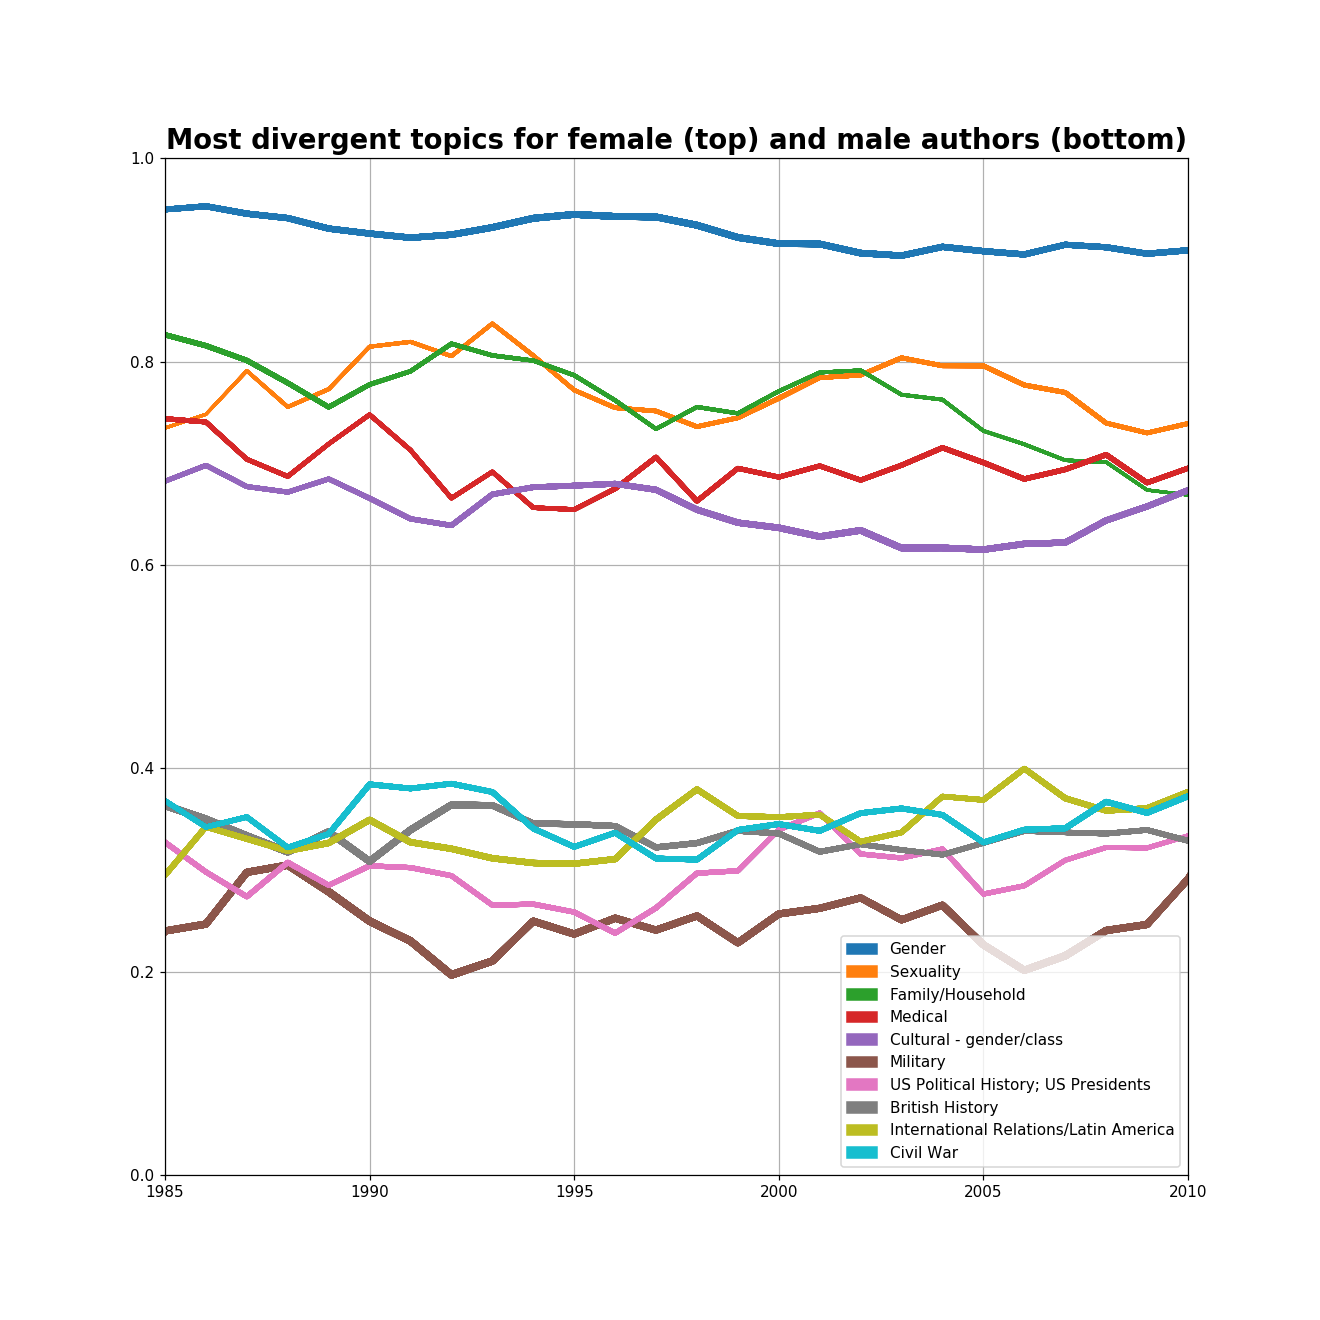

0.0023329555414244186 0.08953237074473257


In [8]:
%matplotlib notebook
from plot_gender_development import plot_gender_development_over_time
plot_gender_development_over_time(
    no_terms_or_topics_to_show=10,
    data='topics',
    display_selector='most_divergent')

What about individual terms? Let's look at the most frequent terms in the gender topic:

The only major change seems to be for gender, which starts out with a frequency score of about 0.9 and ends at about 0.8, i.e. it moves from a
9:1 female/male ratio to a 4:1 ratio. Not super encouraging.

<IPython.core.display.Javascript object>


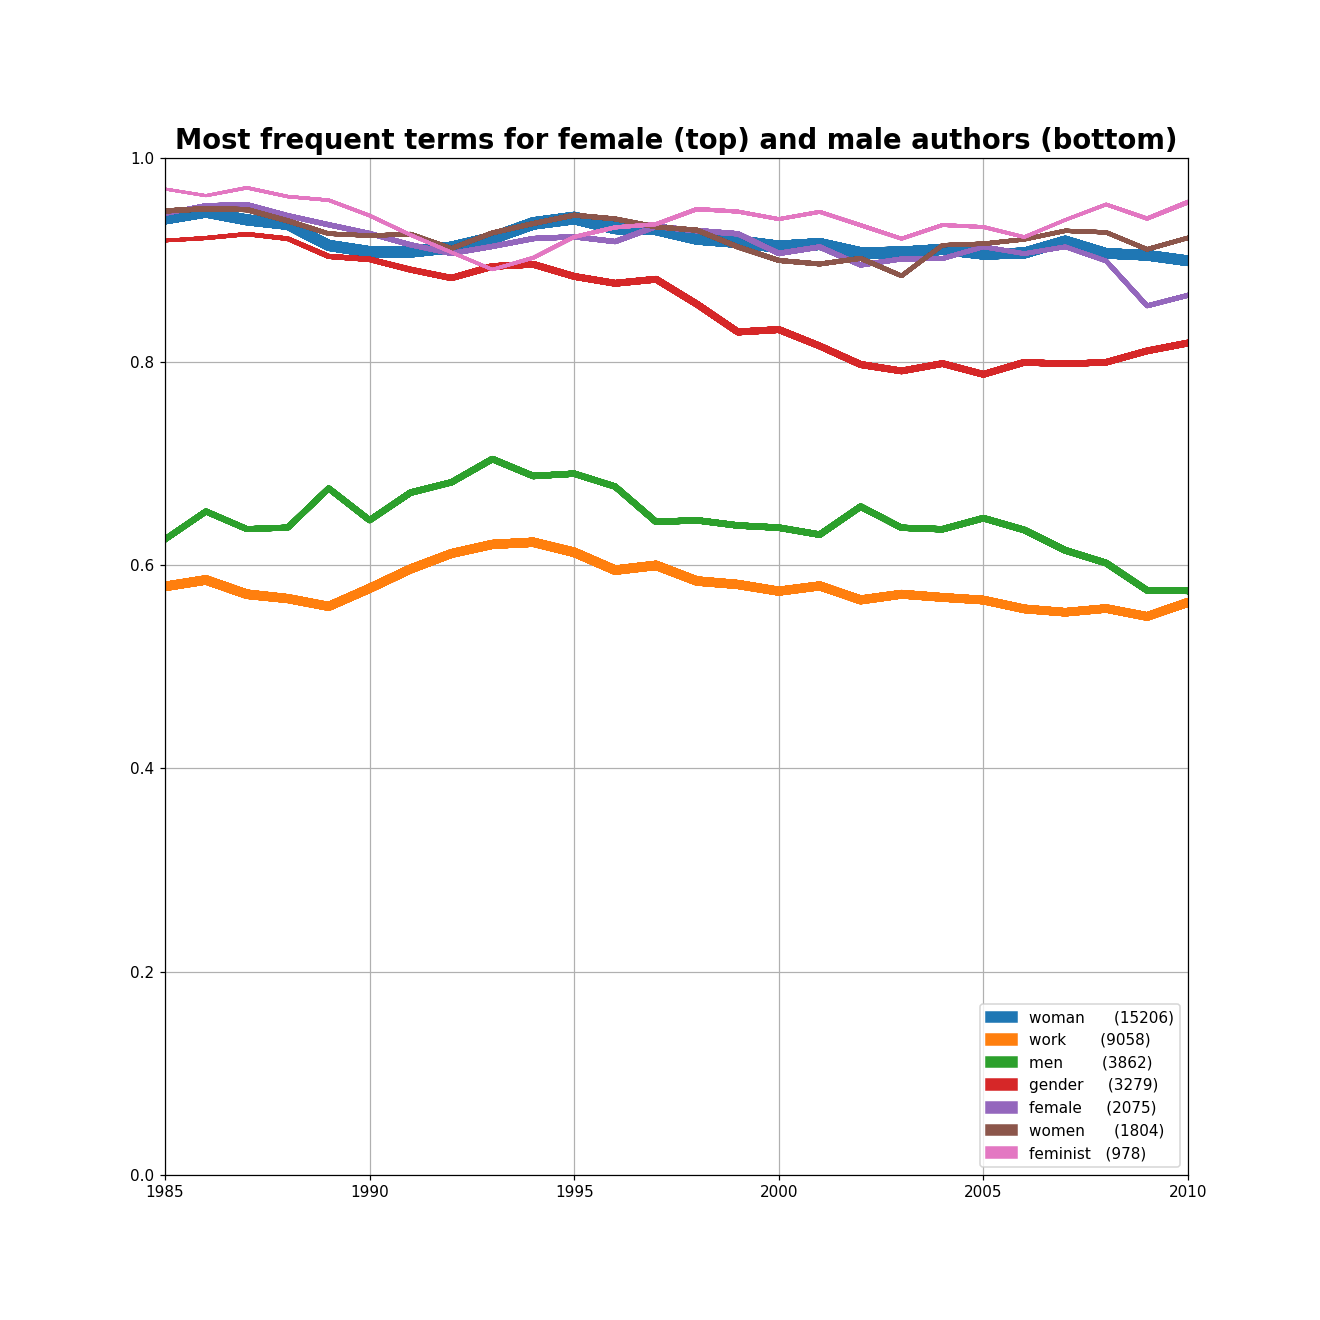

0.01678183613030602 0.8857779980178394


In [9]:
plot_gender_development_over_time(
    no_terms_or_topics_to_show=8,
    data='terms',
    selected_terms_or_topics=['women', 'gender', 'female', 'woman', 'men', 'work', 'feminist'])

## Sexuality, Male vs. Female Authors
Anway, let's move back to the difference between the gender/women's history topic and the sexuality topic. Why is the sexuality topic
less distinctive for female authors?

Let's only retain dissertations that score in the top 20% for the sexuality topic and compare male to female authors:

In [18]:
d = Dataset()

# Retain only dissertations that score in the top 20% for topic 48 (sexuality)
d.topic_percentile_score_filter(topic=48, min_percentile_score=80)

# Create two sub-datasets, one for female authors and one for male authors
c1 = d.copy().filter(author_gender='female')
c2 = d.copy().filter(author_gender='male')

# Run the divergence analysis
divergence_analysis(d, c1, c2, c1_name='female author', c2_name='male author',
                    topics_or_terms='terms', number_of_terms_to_print=10)
pass

             female author    female author freq    male author    male author freq
---------  ---------------  --------------------  -------------  ------------------
1976-1984              204             0.0659341            148           0.120032
1985-1989              243             0.0785391             98           0.0794809
1990-1994              401             0.129606             151           0.122466
1995-1999              693             0.223982             233           0.18897
2000-2004              751             0.242728             307           0.248986
2005-2009              567             0.183258             210           0.170316
2010-2015              235             0.0759535             86           0.0697486


Terms distinctive for Corpus 1: female author. 3094 Theses

      term         dunning    frequency_score    count_total    count female author    count male author
----  ---------  ---------  -----------------  -------------  ---------------------


This is quite striking. When men write about sexuality, the most distinctive terms relate to male homosexuality.

Here's an intriguing idea: Can we in any way make a case that if (mostly) female historians hadn't established gender history in the first place, 
queer history wouldn't have taken off in the same way? Or do gay history and womens' history have completely separate trajectories that accidentally got
bundeled together in the topic model? Let's look at the dissertations that score highly for gay history:


Sidenote: the sexuality topic is at least in part also an urban vice topic (crime, gambling, city, juvenile...) For right now, that's not our focus.



In [11]:
# get the dissertations that mention gay, homosexual, homosexuality, masculinity most frequently
d.print_dissertations_mentioning_terms_or_topics(terms=['gay', 'homosexual', 'homosexuality', 'masculinity'], no_dissertations=30)

2014 Author: male    Advisor: male    City, Suburb, and the Changing Bounds of Lesbian and Gay Life and Politics in Metropolitan Detroit, 1945-1985
2005 Author: male    Advisor: female  American homophobia: "The homosexual menace" in twentieth-century American culture
2006 Author: female  Advisor: female  Persistent pathologies: The odd coupling of alcoholism and homosexuality in the discourses of twentieth century science
1982 Author: male    Advisor: unknown OUT OF THE SHADOWS: THE GAY EMANCIPATION MOVEMENT IN THE UNITED STATES, 1940-1970
2008 Author: male    Advisor: unknown Lavender sons of Zion: A history of gay men in Salt Lake City, 1950--1979
2009 Author: female  Advisor: unknown The unapologetic athlete: The Gay Games, 1982-1994
2014 Author: male    Advisor: male    Special Relationships: Transnational Homophile Activism and Anglo-American Sexual Politics
1998 Author: male    Advisor: male    Americans' attitudes toward gays and lesbians since 1965
2013 Author: male    Advisor

The fact that there are many more women among the advisors than the advisees is certainly suggestive

At any rate, if we look at the gender topic as more of a women's history topic and see the strong queer history focus in the sexuality topic, it makes sense
that the sexuality topic is less gendered than the women's history topic. Keep in mind, though, that sexuality is the second most gendered topic by frequency score 
(0.77) after gender (0.93)

## Advisor Gender
We can also look at the gender of the advisor and try to assess their effects. 

If you're a man with a female advisor, what are terms and topics that you are more likely to write about?

One problem with this comparison is that the combination male student, female advisor appears later in our dataset than
male student, male advisor because faculty jobs remained dominated by men. 
As a result if we compare these datasets from 1976 to 2015, we'll get many effects that are primarily the product of changing historiography overall,
e.g. the replacement of social with cultural history.
```
             female advisor    female advisor freq    male advisor    male advisor freq
---------  ----------------  ---------------------  --------------  -------------------
1976-1984                 0              0                      10           0.00152718
1985-1989                35              0.0275591             412           0.06292
1990-1994               143              0.112598             1183           0.180666
1995-1999               234              0.184252             1575           0.240531
2000-2004               364              0.286614             1688           0.257789
2005-2009               342              0.269291             1230           0.187844
2010-2015               152              0.119685              450           0.0687233
```

What we'll do instead is limit this analysis to the years 2000-2015 for which the datasets are more balanced:
```
             female advisor    female advisor freq    male advisor    male advisor freq
---------  ----------------  ---------------------  --------------  -------------------
2000-2004               364               0.424242            1688             0.501188
2005-2009               342               0.398601            1230             0.365202
2010-2015               152               0.177156             450             0.13361
```


In [20]:
d = Dataset()

# retain only dissertations written by men between 2000 and 2015
d.filter(author_gender='male', start_year=2000, end_year=2015)

# Create two sub-datasets, one for female advisors and one for male advisors
c1 = d.copy().filter(advisor_gender='female')
c2 = d.copy().filter(advisor_gender='male')

# Run the divergence analysis

divergence_analysis(d, c1, c2, c1_name='female advisor', c2_name='male advisor',
                    topics_or_terms='topics', number_of_terms_to_print=6)
divergence_analysis(d, c1, c2, c1_name='female advisor', c2_name='male advisor',
                    topics_or_terms='terms', number_of_terms_to_print=12)
pass

             female advisor    female advisor freq    male advisor    male advisor freq
---------  ----------------  ---------------------  --------------  -------------------
2000-2004               364               0.424242            1688             0.501188
2005-2009               342               0.398601            1230             0.365202
2010-2015               152               0.177156             450             0.13361


Terms distinctive for Corpus 1: female advisor. 858 Theses

    term                                    dunning    frequency_score    frequency_total    frequency female advisor    frequency male advisor
--  ------------------------------------  ---------  -----------------  -----------------  --------------------------  ------------------------
69  (48) Sexuality                          842.473           0.695137         0.00462235                  0.00836544                0.0036688
68  (28) Gender                             371.291           0.6487

I think this is quite interesting. 

A male student with a female advisor is far more likely to write about sexuality and gender. The same goes for race. In each case, the ratio is about 1:2 male to female
advisor. (I don't know why medieval scores so highly here. Is there a reason why medieval history has a lot of female faculty?)


In [21]:
d = Dataset()

# retain only dissertations written by men between 2000 and 2015
d.filter(author_gender='female', start_year=2000, end_year=2015)

# Create two sub-datasets, one for female advisors and one for male advisors
c1 = d.copy().filter(advisor_gender='female')
c2 = d.copy().filter(advisor_gender='male')

# Run the divergence analysis

divergence_analysis(d, c1, c2, c1_name='female advisor', c2_name='male advisor',
                    topics_or_terms='topics', number_of_terms_to_print=5)
divergence_analysis(d, c1, c2, c1_name='female advisor', c2_name='male advisor',
                    topics_or_terms='terms', number_of_terms_to_print=10)
pass

             female advisor    female advisor freq    male advisor    male advisor freq
---------  ----------------  ---------------------  --------------  -------------------
2000-2004               588               0.446809             971             0.492144
2005-2009               489               0.371581             703             0.35631
2010-2015               239               0.181611             299             0.151546


Terms distinctive for Corpus 1: female advisor. 1316 Theses

    term                                        dunning    frequency_score    frequency_total    frequency female advisor    frequency male advisor
--  ----------------------------------------  ---------  -----------------  -----------------  --------------------------  ------------------------
69  (28) Gender                                3162.93            0.642931         0.0372508                   0.0508001                 0.0282133
68  (48) Sexuality                             1202.87 

The same holds true for female students with male vs. female advisors. I guess this is less surprising.


## Microgenres

One thing that strikes me is that when men and women write about one topic, they often do so in quite different ways.

Let's look at the science topic (24):

In [14]:
d = Dataset()
# only include dissertations that score in the 80th percentile or above for the science topic.
d.topic_percentile_score_filter(topic=24, min_percentile_score=80)

# Create two sub-datasets, one for female authors and one for male authors
c1 = d.copy().filter(author_gender='female')
c2 = d.copy().filter(author_gender='male')

divergence_analysis(d, c1, c2, topics_or_terms='topics', c1_name='female', c2_name='male', 
                    sort_by='dunning', number_of_terms_to_print=5)
pass

             female    female freq    male    male freq
---------  --------  -------------  ------  -----------
1976-1984       226      0.133807      407    0.154284
1985-1989       188      0.111308      330    0.125095
1990-1994       195      0.115453      376    0.142532
1995-1999       313      0.185317      445    0.168688
2000-2004       344      0.203671      517    0.195982
2005-2009       294      0.174067      396    0.150114
2010-2015       129      0.0763766     167    0.0633055


Terms distinctive for Corpus 1: female. 1689 Theses

    term                            dunning    frequency_score    frequency_total    frequency female    frequency male
--  ----------------------------  ---------  -----------------  -----------------  ------------------  ----------------
69  (28) Gender                    14931.5            0.92662          0.0105543            0.0240624        0.00190554
68  (36) Medical                    6240.64           0.688611         0.0308498       

Among women, it's the gender, medical, and sexuality topics predominate. Among men, intellectual, military, and US political history.

Gender, sexuality, and military aren't super interesting. They already skew male and female in the general dataset. However, 
the contrast between medical and intellectual is interesting. Men are more likely to write at the intersection of intellectual history and
history of science; women between medical history and history of science. 
Here are some examples: 

In [15]:
# History of science, male-dominated areas
d.print_dissertations_mentioning_terms_or_topics(['topic.36', 'topic.28', 'topic.48'], no_dissertations=20)

1999 Author: female  Advisor: male    Puerperal insanity: Women, psychiatry, and the asylum in Victorian England, 1820--1895
2002 Author: female  Advisor: female  Rethinking the rise of scientific medicine: Trier, Germany, 1880--1914
1999 Author: female  Advisor: female  'It did not seem like a hospital it seemed like home': Women's experiences as patients at Peterson's Hospital, Ann Arbor, Michigan, 1902-1933
1997 Author: female  Advisor: male    Earnestly working to improve Russia's future: Russian women physicians, 1867-1905
2000 Author: male    Advisor: female  "Of physick and astronomy": Almanacs and popular medicine in Massachusetts, 1700--1764
1995 Author: female  Advisor: female  Doubtful sex: Cases and concepts of hermaphroditism in France and Britain, 1868-1915
1999 Author: female  Advisor: male    A vital force: Women physicians and patients in American homeopathy, 1850--1930
2006 Author: female  Advisor: male    'The wife your husband needs': Marriage counseling, religion, 

In [16]:
# History of science, female-dominated areas
d.print_dissertations_mentioning_terms_or_topics(['topic.42', 'topic.55', 'topic.6'], no_dissertations=20)

1998 Author: male    Advisor: male    G. W. Leibniz: Personhood, moral agency, and meaningful immortality
1994 Author: male    Advisor: male    Aquinas on gravitational motion: An investigation
1990 Author: male    Advisor: unknown Seascape with fog: Analogy, certainty and cultural exemplars in John Locke's "An Essay Concerning Human Understanding"
2015 Author: male    Advisor: male    Spinoza and the problem of universals: A study and research guide
2006 Author: male    Advisor: unknown Acquiring "feelings that do not err": Moral deliberation and the sympathetic point of view in the ethics of Dai Zhen
1997 Author: male    Advisor: unknown Jiddu Krishnamurti and Thich Nhat Hanh on the silence of God and the human condition
2004 Author: male    Advisor: male    Men on "iron ponies", the death and rebirth of the modern United States cavalry
1996 Author: male    Advisor: unknown Self, sympathy, and society in Hume's "Treatise of Human Nature"
2003 Author: male    Advisor: male    The AEF 

The point with the microgenres is: Even if two dissertations share the same overarching area (history of science; 19th century U.S. history etc.), 
we can identify substantial differences between the work of men and women. And I think this applies to all areas we might look at.

## Institutions
Just for fun, we can also apply the same analysis to institutions and compare, for example, Harvard dissertations against non-Harvard dissertations. 

In [17]:
d = Dataset()
# only include dissertations that score in the 80th percentile or above for the science topic.

# Create two sub-datasets, one for harvard dissertations and one for non-harvard dissertations
c1 = d.copy().filter(institution_filter='harvard')
c2 = d.copy().filter(institution_filter='not_harvard')

divergence_analysis(d, c1, c2, topics_or_terms='topics', c1_name='harvard', c2_name='not harvard', 
                    sort_by='dunning', number_of_terms_to_print=8)
pass

             harvard    harvard freq    not harvard    not harvard freq
---------  ---------  --------------  -------------  ------------------
1976-1984         91       0.116967            3034           0.145474
1985-1989        116       0.1491              2532           0.121404
1990-1994        131       0.16838             2906           0.139336
1995-1999        144       0.18509             3892           0.186613
2000-2004         97       0.124679            3988           0.191216
2005-2009        136       0.174807            3231           0.154919
2010-2015         63       0.0809769           1273           0.0610376


Terms distinctive for Corpus 1: harvard. 778 Theses

    term                   dunning    frequency_score    frequency_total    frequency harvard    frequency not harvard
--  -------------------  ---------  -----------------  -----------------  -------------------  -----------------------
69  (47) Classics          4515.66           0.724869         0.0

Not super useful but I'm sure Londa will get a kick out of seeing that gender is one of the most under-represented topics among 
Harvard dissertations. 